## Projet final algorithmique
### Objectifs
* Decouvrir les librairies pandas, networkx, folium
* Comprendre les ADT et implementer une File, une Pile
https://en.wikipedia.org/wiki/Abstract_data_type
* Comprendre les methodes de parcours de graphe
* BFS ou parcours en largeur https://fr.wikipedia.org/wiki/Algorithme_de_parcours_en_largeur
* DFS ou parcours en profondeur
https://fr.wikipedia.org/wiki/Algorithme_de_parcours_en_profondeur
* Comprendre les heuristiques de search en IA
https://online-learning.harvard.edu/course/cs50s-introduction-artificial-intelligence-python
* Cours IA
https://cs50.harvard.edu/ai/2020/
https://courses.edx.org/courses/course-v1:HarvardX+CS50AI+1T2020/courseware/3b4d945d89eb40bcad81746770a81c3b/918082613c254e2da55e31d1894bc4be/?activate_block_id=block-v1%3AHarvardX%2BCS50AI%2B1T2020%2Btype%40sequential%2Bblock%40918082613c254e2da55e31d1894bc4be

### Partie 1
* Decouvrir les librairies pandas, networkx, folium

In [821]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import csv
import folium

%matplotlib inline

### Lire le fichier de graphe avec pandas en utilisant read_csv
* Documentation sur pandas: http://www.python-simple.com/python-pandas/dataframes-indexation.php

#### TODO: Utilisez la bibliothéque pandas pour lire les fichiers transport-nodes.csv et transport-relationships.csv

In [822]:
transport_nodes = pd.read_csv("data/transport-nodes.csv")
transport_nodes

,id,latitude,longitude,population
0,Amsterdam,52.379189,4.899431,821752
1,Utrecht,52.092876,5.104480,334176
2,Den Haag,52.078663,4.288788,514861
3,Immingham,53.612390,-0.222190,9642
4,Doncaster,53.522850,-1.131160,302400
5,Hoek van Holland,51.977500,4.133330,9382
6,Felixstowe,51.963750,1.351100,23689
7,Ipswich,52.059170,1.155450,133384
8,Colchester,51.889210,0.904210,104390
9,London,51.509865,-0.118092,8787892


In [823]:
transport_arcs = pd.read_csv("data/transport-relationships.csv")
transport_arcs 

,src,dst,relationship,cost
0,Amsterdam,Utrecht,EROAD,46
1,Amsterdam,Den Haag,EROAD,59
2,Den Haag,Rotterdam,EROAD,26
3,Amsterdam,Immingham,EROAD,369
4,Immingham,Doncaster,EROAD,74
5,Doncaster,London,EROAD,277
6,Hoek van Holland,Den Haag,EROAD,27
7,Felixstowe,Hoek van Holland,EROAD,207
8,Ipswich,Felixstowe,EROAD,22
9,Colchester,Ipswich,EROAD,32


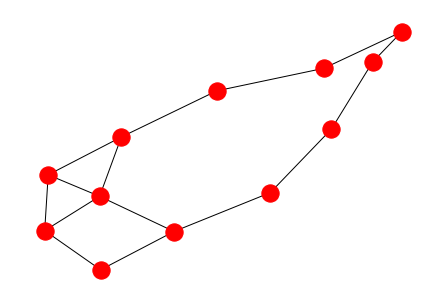

In [824]:
Graphe=nx.from_pandas_dataframe(transport_arcs,source= 'src',target='dst',edge_attr=['relationship','cost'])
nx.draw(Graphe)
plt.show()


### TODO: Construire le graphe et le visualiser  avec la fonction from_pandas_dataframe de networkx
https://networkx.github.io/
* Dessiner le graphe avec la fonction draw de networkX

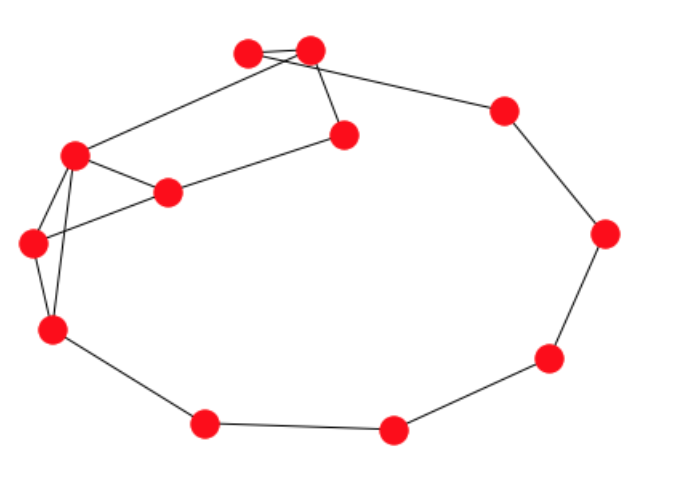

### TODO: Ajouter des attributs longitude et latitude aux noeuds avec Networkx en utilisant:
* le dictionnaire "node" de networkx qui contient les noeuds
* le dataframe transportnode defini plus haut
* Des exemples d'utilisation de la fonction set_node_attributes
https://www.programcreek.com/python/example/89530/networkx.set_node_attributes

In [825]:
dict(Graphe.node)

{'Amsterdam': {},
 'Utrecht': {},
 'Den Haag': {},
 'Rotterdam': {},
 'Immingham': {},
 'Doncaster': {},
 'London': {},
 'Hoek van Holland': {},
 'Felixstowe': {},
 'Ipswich': {},
 'Colchester': {},
 'Gouda': {}}

In [826]:
'''
Ajouter des attributs
Inputs: 
    Un graphe, 
    un dataframe contenant les données, 
    nom de l'attribut, 
    le nom de la colonne index du dataframe
Pas d'output:
Utiilisez la fonction set_node_attributes de networkx

'''
def ajouterAttribut(myGraphe,dfnoeuds, nomAttribut,nomIndex):
    
    Index = list(dfnoeuds[nomIndex])
    Attribut = list(dfnoeuds[nomAttribut])
    name = dict(zip(Index,Attribut))
    nx.set_node_attributes(myGraphe, name,nomAttribut)
    

In [827]:
ajouterAttribut(Graphe,transport_nodes,'latitude','id')
ajouterAttribut(Graphe,transport_nodes,'longitude','id')
ajouterAttribut(Graphe,transport_nodes,'population','id')

In [828]:
dict(Graphe.nodes)

{'Amsterdam': {'latitude': 52.379189000000004,
  'longitude': 4.899431,
  'population': 821752},
 'Utrecht': {'latitude': 52.092876000000004,
  'longitude': 5.104480000000001,
  'population': 334176},
 'Den Haag': {'latitude': 52.078663,
  'longitude': 4.288787999999999,
  'population': 514861},
 'Rotterdam': {'latitude': 51.9225,
  'longitude': 4.47917,
  'population': 623652},
 'Immingham': {'latitude': 53.612390000000005,
  'longitude': -0.22219,
  'population': 9642},
 'Doncaster': {'latitude': 53.52285,
  'longitude': -1.13116,
  'population': 302400},
 'London': {'latitude': 51.509865000000005,
  'longitude': -0.118092,
  'population': 8787892},
 'Hoek van Holland': {'latitude': 51.9775,
  'longitude': 4.13333,
  'population': 9382},
 'Felixstowe': {'latitude': 51.96375,
  'longitude': 1.3511,
  'population': 23689},
 'Ipswich': {'latitude': 52.05917, 'longitude': 1.15545, 'population': 133384},
 'Colchester': {'latitude': 51.88921,
  'longitude': 0.9042100000000001,
  'populatio

In [829]:
dict(Graphe.edges)

{('Amsterdam', 'Utrecht'): {'relationship': 'EROAD', 'cost': 46},
 ('Amsterdam', 'Den Haag'): {'relationship': 'EROAD', 'cost': 59},
 ('Amsterdam', 'Immingham'): {'relationship': 'EROAD', 'cost': 369},
 ('Utrecht', 'Gouda'): {'relationship': 'EROAD', 'cost': 35},
 ('Den Haag', 'Rotterdam'): {'relationship': 'EROAD', 'cost': 26},
 ('Den Haag', 'Hoek van Holland'): {'relationship': 'EROAD', 'cost': 27},
 ('Den Haag', 'Gouda'): {'relationship': 'EROAD', 'cost': 32},
 ('Rotterdam', 'Gouda'): {'relationship': 'EROAD', 'cost': 25},
 ('Rotterdam', 'Hoek van Holland'): {'relationship': 'EROAD', 'cost': 33},
 ('Immingham', 'Doncaster'): {'relationship': 'EROAD', 'cost': 74},
 ('Doncaster', 'London'): {'relationship': 'EROAD', 'cost': 277},
 ('London', 'Colchester'): {'relationship': 'EROAD', 'cost': 106},
 ('Hoek van Holland', 'Felixstowe'): {'relationship': 'EROAD', 'cost': 207},
 ('Felixstowe', 'Ipswich'): {'relationship': 'EROAD', 'cost': 22},
 ('Ipswich', 'Colchester'): {'relationship': 'ER

### Representer les noeuds sur une carte avec Folium

In [830]:
import folium
'''
On construit le Map avec une location par defaut
'''
basemap = folium.Map(
    location=[52.3791890, 4.899431],
    zoom_start=6,
    tiles='openstreetmap'
)


In [831]:
basemap

### Ajouter des marqueurs pour tous les noeuds du reseau avec folium.Marker

In [832]:
for i in Graphe.node:
    folium.Marker([Graphe.node[i]['latitude'],Graphe.node[i]['longitude']],tooltip = 'Population '+str(Graphe.node[i]['population'])).add_to(basemap)

In [833]:
basemap

In [834]:
'''
Cette fonction permet de construire une liste de liste comprenant pour chaque
sous-liste ses coordonnées et celles d'un voisin
Ces points peuvent etre utilisés pour représenter les lignes dans la carte
Input: le graphe
Output: Une liste de couples representant les longitudes et latitudes d'un point et d'un de ses voisins
'''
def construirePointsImage(myGraphe):
    points = []
    for i in myGraphe.node:
        
        for neighbor in myGraphe.neighbors(i):
            S = []
            S.append([myGraphe.node[i]["latitude"],myGraphe.node[i]["longitude"]])
            S.append([myGraphe.node[neighbor]["latitude"],myGraphe.node[neighbor]["longitude"]])
            points.append(S)
    return points
        


In [835]:
coordonneesvoisins = construirePointsImage(Graphe)
coordonneesvoisins

[[[52.379189000000004, 4.899431], [52.092876000000004, 5.104480000000001]],
 [[52.379189000000004, 4.899431], [52.078663, 4.288787999999999]],
 [[52.379189000000004, 4.899431], [53.612390000000005, -0.22219]],
 [[52.092876000000004, 5.104480000000001], [52.379189000000004, 4.899431]],
 [[52.092876000000004, 5.104480000000001], [52.01667, 4.70833]],
 [[52.078663, 4.288787999999999], [52.379189000000004, 4.899431]],
 [[52.078663, 4.288787999999999], [51.9225, 4.47917]],
 [[52.078663, 4.288787999999999], [51.9775, 4.13333]],
 [[52.078663, 4.288787999999999], [52.01667, 4.70833]],
 [[51.9225, 4.47917], [52.078663, 4.288787999999999]],
 [[51.9225, 4.47917], [52.01667, 4.70833]],
 [[51.9225, 4.47917], [51.9775, 4.13333]],
 [[53.612390000000005, -0.22219], [52.379189000000004, 4.899431]],
 [[53.612390000000005, -0.22219], [53.52285, -1.13116]],
 [[53.52285, -1.13116], [53.612390000000005, -0.22219]],
 [[53.52285, -1.13116], [51.509865000000005, -0.118092]],
 [[51.509865000000005, -0.118092], 

### TODO: Visualiser une carte du graphe avec ses noeuds et les arcs sous forme lignes

In [836]:
'''
A faire
Permet de visualiser une carte du graphe avec ses noeuds et les arcs sous forme lignes
Prend en entrée:
- un graphe
- les coordonnées entre chaque point et ses voisins calculées avec la fonction ci-dessus
- Une location par defaut
- Un paramétrage de folium
Output: la carte
'''
        
def visualiserFolium(myGraphe, points, locationpardefaut = [52.3791890, 4.899431],tiles='Stamen Toner' ):
    for i in Graphe.node:
        folium.Marker([Graphe.node[i]['latitude'],Graphe.node[i]['longitude']],tooltip = 'Population '+str(Graphe.node[i]['population'])).add_to(basemap)
        print([Graphe.node[i]['latitude'],Graphe.node[i]['longitude']])
    arc=folium.PolyLine(locations=points,color='red')
    basemap.add_child(arc)  
    return(basemap) 
    
    

In [837]:
visualiserFolium(Graphe,coordonneesvoisins)

[52.379189000000004, 4.899431]
[52.092876000000004, 5.104480000000001]
[52.078663, 4.288787999999999]
[51.9225, 4.47917]
[53.612390000000005, -0.22219]
[53.52285, -1.13116]
[51.509865000000005, -0.118092]
[51.9775, 4.13333]
[51.96375, 1.3511]
[52.05917, 1.15545]
[51.88921, 0.9042100000000001]
[52.01667, 4.70833]


### Partie 2
* Dans cette partie vous allez implémenter des ADT: Noeud, Graphe, File, Pile



#### Implementer la classe Noeud
* Un noeud a un nom
* Un noeud a des attributs sous forme de dictionnaire pyton avec comme cle:
    une liste de coordonnes ( latitude, longitude)
    
    la taille de la population
* La liste des voisins sera initialisée à la création des arcs dans le graphe 
*  Vous ajouterez toutes les methodes nécessaires 
        
    
        

In [838]:
class Noeud:
    def __init__(self,name):
        self.name = name['name']
        self.attributs = { "coordonnees": [(name['longitude']),(name['latitude'])] , "population": int(name['population']) }
        self.listeNomVoisin = []
        
    def setAttribut(self,key, values):
        
        lati = attributs[i]['latitude']
        longi = attributs[i]['longitude']
        cordonnes = (lati,longi)
        population = attributs[i]['population']
        pass
        
    def getAttribut(self,key):
        
        if (key == 'coordonnees') :
            return self.attributs['coordonnees' ]
        if (key == 'population') :
            return self.attributs['population']

    def getName(self):
        return(self.name)
        
    '''
    Deux noeuds sont egaux s'ils ont même name
    '''
    def egal(self, noeud):
        return self.getName() == noeud.getName()
        

#### Implementer la classe Graphe
* Les noeuds des graphes doivent être initialisé à l'aide du fichier 
transport-node.csv ( vous n'utiliserez plus pandas). Vous initiliserez aussi les attributs
* Les arcs des graphes doivent être initialisé à l'aide du fichier 
transport-relations.csv ( vous n'utiliserez plus pandas). Vous initiliserez aussi les attributs
* On doit pouvoir retrouver les coordonnées d'un noeud grâce à son nom
* On doit avoir la liste des noeuds voisins d'un noeud donné. Le graphe est non orienté donc le voisinage est reciproque
        

In [839]:
class Graphe:
    '''
    Les noeuds seront mis dans une liste
    Les arcs forment un dictionnaire avec comme clé les noms des noeuds et comme valeurs une liste de noeud
    '''
    def __init__(self):
        self.noeuds = []
        self.arcs = {}
    '''
    Creer les neouds avec un fichier csv
    On peut mettre tous les noeuds dans une liste
    On doit attribuer à chaque noeud ses attributs: latitude, longitude, population
    On initialise le dictionnaire des arcs en creant la cle avec le nom du noeud et la valeur avec une liste vide
    N'oubliez pas de gerer les exceptions
    '''    
    def creerNoeuds(self,fichiernoeuds):
        with open(fichiernoeuds) as f:
            reader = csv.reader(f)
            next(reader)

            data = []
            for row in reader:
                data.append({
                "name": row[0],
                "longitude": float (row[1]),
                 "latitude": float(row[2]),
                 "population": row[3],

            })
            self.noeuds = data
        

        
    '''
    - Creer les arcs avec un  fichier csv
    - Utilisez un dictionnaire pour les arcs
    - N'oubliez pas que le graphe est non oriente.
    - Pour chaque noeud on mettra des tuples dans la liste de ses voisins: (nom du voisin, cout du chemin)
    - Gerer les exceptions
    '''   
    def creerArc(self, fichierarcs):
        with open('./data/transport-relationships.csv') as f:
            readers = csv.reader(f)
            next(readers)

            datas = []
            for row in readers:
                datas.append({
                    "name": row[0],
                    "voisins":  (row[1],int(row[3])),

            })
            self.arcs = datas
            
        
    '''
    Retrouver un noeud à partir de son nom
    '''   
    def getNoeud(self,name):
        a = self.noeuds
        b=0
        for i in range(len(a)):
            if a[i]['name'] == name: 
                b = a[i]
        return b
    '''
    Trouver les noeuds voisins d'un noeud donne
    '''
    def getVoisins(self,noeud):
        a = self.noeuds
        b = self.arcs
        c = []
        d = []
        for i in range(len(b)):
            if b[i]['voisins'][0] == noeud: 
                c.append(b[i]['name'])
            if b[i]['name'] == noeud: 
                c.append(b[i]['voisins'][0])
        
        for i in range (len(a)):
            if a[i]['name'] in c:
                d.append(a[i])
        return d
        
    
    '''
    Recuperer pour un noeud donne les latitudes et longitudes de ses voisins
    Constituer des pairs de listes de coordonnées entre le point et ses voisins
    pour une representation sous folium
    
    '''
    def getCoordonnesVoisins(self, noeud):
        
        
        listecoord = []
        # voise est un tuple et je veux recuperer le nom du noeud voisin 
        # qui est le premier lement du tuple
        
        for voise in self.getVoisins(noeud):
            # Recupere un noeud voisin
            noeudVoisin = self.getNoeud(voise[0])
            listecoord.append([noeud.getAttribut('coordonnees'),noeudVoisin.getAttribut('coordonnees')])
        return listecoord
    
    
    
    def getCoordonnesVoi(self, noeud):
        listecoord = []
        n = self.getNoeud(noeud)
        a = 0
        nn = 0
        nn = Noeud(n)
        nnn = 0
        l = len(self.getVoisins(noeud))
        ll = self.getVoisins(noeud)
        # voise est un tuple et je veux recuperer le nom du noeud voisin 
        # qui est le premier lement du tuple
        for voise in range (l): 
            nnn = Noeud(ll[a])
            # Recupere un noeud voisin
            listecoord.append([nn.getAttribut('coordonnees'),nnn.getAttribut('coordonnees')])
            a = a + 1
        return listecoord
    
    '''
    Recuperer les coordonnees d'une liste de neouds pour visualiser sous folium
    Prend en entrée une liste de nom de noeud
    Retourne une liste de sous-listes à deux elements de coordonnées
    '''
    def getListeCoordonnees(self,listeNoeuds):
        coord = []
        l = len(listeNoeuds)
        ll = listeNoeuds
        lll = 0
        a = 0
        for name in listeNoeuds:
            lll = Noeud(ll[a])
            llll = Noeud(ll[a-1])
            coord.append(lll.getAttribut('coordonnees'))
            a = a + 1
        return coord
    
    '''
    Visualiser les noeuds et les arcs sous folium
    Entree: le parametre explored sera utilisé pour les parcours de graphe
    '''
    
    def visualiserFolium(self, locationpardefaut = [52.3791890, 4.899431],tiles='Stamen Toner',explored = None ):
    
        basemap = folium.Map(location= locationpardefaut,zoom_start=6,tiles=tiles)
        
        
        a = 0
        for i in self.noeuds:
            i = Noeud(self.noeuds[a])
            folium.Marker(i.getAttribut('coordonnees'),tooltip = 'Population'+str(i.getAttribut('population'))).add_to(basemap)
            folium.PolyLine(self.getCoordonnesVoi(i.getName()), color="red", weight=2.5, opacity=1).add_to(basemap)
            a = a + 1
            
            if explored != None:
                folium.PolyLine(self.getListeCoordonnees(explored), color="green", weight=2.5, opacity=1).add_to(basemap)
        return basemap

In [840]:
G = Graphe()
G.creerNoeuds('./data/transport-nodes.csv')

In [841]:
G.creerArc('./data/transport-relationships.csv')

In [842]:
G.arcs

[{'name': 'Amsterdam', 'voisins': ('Utrecht', 46)},
 {'name': 'Amsterdam', 'voisins': ('Den Haag', 59)},
 {'name': 'Den Haag', 'voisins': ('Rotterdam', 26)},
 {'name': 'Amsterdam', 'voisins': ('Immingham', 369)},
 {'name': 'Immingham', 'voisins': ('Doncaster', 74)},
 {'name': 'Doncaster', 'voisins': ('London', 277)},
 {'name': 'Hoek van Holland', 'voisins': ('Den Haag', 27)},
 {'name': 'Felixstowe', 'voisins': ('Hoek van Holland', 207)},
 {'name': 'Ipswich', 'voisins': ('Felixstowe', 22)},
 {'name': 'Colchester', 'voisins': ('Ipswich', 32)},
 {'name': 'London', 'voisins': ('Colchester', 106)},
 {'name': 'Gouda', 'voisins': ('Rotterdam', 25)},
 {'name': 'Gouda', 'voisins': ('Utrecht', 35)},
 {'name': 'Den Haag', 'voisins': ('Gouda', 32)},
 {'name': 'Hoek van Holland', 'voisins': ('Rotterdam', 33)}]

In [843]:

G.getListeCoordonnees(a)



[[51.9775, 4.13333], [52.05917, 1.15545]]

In [844]:
a = G.getVoisins('London')
a

[{'name': 'Doncaster',
  'longitude': 53.52285,
  'latitude': -1.13116,
  'population': '302400'},
 {'name': 'Colchester',
  'longitude': 51.88921,
  'latitude': 0.90421,
  'population': '104390'}]

In [845]:
b = G.getCoordonnesVoi('Gouda')
b

[[[52.01667, 4.70833], [52.092876, 5.10448]],
 [[52.01667, 4.70833], [52.078663, 4.288788]],
 [[52.01667, 4.70833], [51.9225, 4.47917]]]

In [846]:
G. visualiserFolium()

In [847]:
G.noeuds[1]

{'name': 'Utrecht',
 'longitude': 52.092876,
 'latitude': 5.10448,
 'population': '334176'}

### Partie 3
* Implementer les classes File et Pile en utilisant les list en python
* Quelques liens interessants:
https://openclassrooms.com/fr/courses/900279-apprenez-a-programmer-avec-ada/2144666-les-types-abstraits-de-donnees-listes-files-piles

https://fr.wikipedia.org/wiki/Type_abstrait

http://www.csi.uottawa.ca/~flocchin/CSI2510/CSI2510PileFile.pdf



In [848]:


class Pile():
    '''
    Classe Pile: voir les definitions ci-dessous
    La classe dispose d'une structure de type list pour ranger les données
    Les consultations, les insertions, les suppressions se font du même cote
    Dernier arrive premier servi : LIFO
    '''
    def __init__(self):
        self.elements = []
    '''
    Insere un objet en tete de la pile
    '''
    def push(self,noeud):
         return self.elements.insert(0,noeud)
        
    '''
    Retourne True si  un noeud est dans la pile
    '''
    
    def contains_noeud(self, name):
        for i in range(len(self.elements)):
            l = self.elements[i]
            l = Noeud(l)
            name = Noeud(name)
            return l.egal(name)
        
                
    '''
    Retourne true si la pile est vide
    '''
    def empty(self):
        if self.elements == []:
            return True
        else:
            return False
       
    '''
    Retourne et supprime l'element en tete de pile
    Retourne une exception si la pile est vide
    '''
    def remove(self):
        try :            
            if self.empty():
                raise ValueError
            else:
                sup = self.elements.pop(0)
            return  sup   
    
        except ValueError:
            print('la liste est vide')
       




In [849]:
w.empty()

False

In [850]:
w = Pile()
w.push(10)
w.push(20)
print(w.elements)
w.remove()
print(w.elements)


[20, 10]
[10]


In [851]:

class File(Pile):
    '''
    Classe File: voir les definitions ci-dessous
    La classe dispose d'une structure de type list pour ranger les données
    Les éléments sont enfilés (insérés) du coté arrière et défilés (retirés)
    du coté avant
    Premier arrive premier servi : FIFO
    File et Pile peuvent partager certaines methodes donc utilisez l'heritage pour definir
    la classe File. 
    Normalement vous ne devez changer l'implementation d'une seule methode
    '''
    

    def push(self,noeud):
        
        return self.elements.append(noeud)
 
        
        

In [852]:
z = File()
z.push(10)
z.push(20)
z.remove()
z.elements

[20]

### Partie 3
* Implementer les algorithmes de parcours de graphe: BFS ET DFS
* Algorithme BFS et DFS
https://fr.wikipedia.org/wiki/Algorithme_de_parcours_en_largeur
https://fr.wikipedia.org/wiki/Algorithme_de_parcours_en_profondeur
Les deux parcours utilisent le même algorithme mais différent suivant la structure de données utilisée comme frontiére. La frontiére est une structure de données qui permet manipuler les noeuds intermediaires. 
#### Algorithme
* On met le noeud source dans la frontiére
* On cree une structure vide devant contenir les noeuds explorés
* Repeter
    * Si la frontiere est vide pas de solution
    * Prendre un noeud dans la frontiere ( idée de suppression)
    * Si le noeud est le noeud destination alors solution
    * Sinon:
        * Mettre le noeud dans l'ensemble des noeuds deja explorés
        * Ajouter les voisins dans la frontiére s'ils ne sont pas dans la frontiere et s'ils ne sont pas deja explores



In [878]:
'''
Implémenter le parcours en profondeur non recursif entre deux noeuds
Prend en parametre:
- un graphe
- un noeud source
- un noeud destination
Output:
une liste contenant les noms des noeuds explorés pour aller du noeud source vers le noeud destination 
Vous completerez certaines parties du code
'''

def parcoursDFS(myGraphe,noeudSRC,noeudDST):
        """Trouver un parcours DFS entre noeudSRC et noeudDST"""

        # Le nombre de noeuds explorés
        num_explored = 0

        # Initialisation de la frontiere avec le noeud source
        
        frontiere = File() 
        frontiere.push(noeudSRC)

        # Initialisation de la liste des noeuds explorés
        explored = []

        # On boucle jusuq'à trouver la solution
        while True:

            # S'il n'y a aucun noeud dans la frontiére alors pas de solution
            if frontiere.empty():
                raise Exception("no solution")

            # Choisir un node dans la frontiere
            node = frontiere.remove()
            nod = Noeud(node)
            noeudDS = Noeud(noeudDST)
            num_explored += 1

            # Si ce noeud est le noeud destination
            if nod.egal(noeudDS):
                
                # Ajouter le aux noeuds deja explorés
                explored.append(noeudDST)
                
                return explored, num_explored

            # Marquer le noeud comme explore
            explored.append(node)

            # Ajouter tous les voisins du noeud à la frontiere
            l = len(myGraphe.getVoisins(nod.getName()))
            ll = myGraphe.getVoisins(nod.getName())
            a = 0
            for voise in range (l) :
                
                lll = Noeud(ll[a])
                if not frontiere.contains_noeud(ll[a]) and ll[a] not in explored:
                    
                    frontiere.push(myGraphe.getNoeud(lll.getName()))
                a = a + 1


In [854]:
G.noeuds[4]

{'name': 'Doncaster',
 'longitude': 53.52285,
 'latitude': -1.13116,
 'population': '302400'}

In [880]:
a = G.getVoisins('Doncaster')
a

[{'name': 'Immingham',
  'longitude': 53.61239,
  'latitude': -0.22219,
  'population': '9642'},
 {'name': 'London',
  'longitude': 51.509865,
  'latitude': -0.118092,
  'population': '8787892'}]

In [881]:
list(parcoursDFS(G,G.noeuds[4],G.noeuds[2])[0])

[{'name': 'Doncaster',
  'longitude': 53.52285,
  'latitude': -1.13116,
  'population': '302400'},
 {'name': 'Immingham',
  'longitude': 53.61239,
  'latitude': -0.22219,
  'population': '9642'},
 {'name': 'London',
  'longitude': 51.509865,
  'latitude': -0.118092,
  'population': '8787892'},
 {'name': 'Amsterdam',
  'longitude': 52.379189,
  'latitude': 4.899431,
  'population': '821752'},
 {'name': 'Colchester',
  'longitude': 51.88921,
  'latitude': 0.90421,
  'population': '104390'},
 {'name': 'Utrecht',
  'longitude': 52.092876,
  'latitude': 5.10448,
  'population': '334176'},
 {'name': 'Den Haag',
  'longitude': 52.078663,
  'latitude': 4.288788,
  'population': '514861'}]

In [871]:
expl = list(parcoursDFS(G,G.noeuds[4],G.noeuds[2])[0])
bb = G.arcs
cout = 0
for i in range (len(expl) - 1): 
    nom = expl[i]['name']
    voisin = expl[i + 1]['name']   
    for i in range(len(bb)):
        if (nom == bb[i]['name'] and voisin == bb[i]['voisins'][0]) : 
            cout = cout + bb[i]['voisins'][1]
    print(cout)


0
0
0
0
0
0


In [873]:
bb[0]['voisins'][0]

'Utrecht'

In [870]:
G.arcs

[{'name': 'Amsterdam', 'voisins': ('Utrecht', 46)},
 {'name': 'Amsterdam', 'voisins': ('Den Haag', 59)},
 {'name': 'Den Haag', 'voisins': ('Rotterdam', 26)},
 {'name': 'Amsterdam', 'voisins': ('Immingham', 369)},
 {'name': 'Immingham', 'voisins': ('Doncaster', 74)},
 {'name': 'Doncaster', 'voisins': ('London', 277)},
 {'name': 'Hoek van Holland', 'voisins': ('Den Haag', 27)},
 {'name': 'Felixstowe', 'voisins': ('Hoek van Holland', 207)},
 {'name': 'Ipswich', 'voisins': ('Felixstowe', 22)},
 {'name': 'Colchester', 'voisins': ('Ipswich', 32)},
 {'name': 'London', 'voisins': ('Colchester', 106)},
 {'name': 'Gouda', 'voisins': ('Rotterdam', 25)},
 {'name': 'Gouda', 'voisins': ('Utrecht', 35)},
 {'name': 'Den Haag', 'voisins': ('Gouda', 32)},
 {'name': 'Hoek van Holland', 'voisins': ('Rotterdam', 33)}]

In [874]:
# Visualisation des arcs en rouge et visualisation des noeuds parcourus pour aller du premier au deuxieme noeud en vert
G.visualiserFolium(explored = list(parcoursDFS(G,G.noeuds[4],G.noeuds[2])[0]))

In [752]:
#### TODO: Implementer le parcours en profondeur recursif et calculer le coût du chemin

def parcoursDFScout(myGraphe,noeudSRC,noeudDST):
        """Trouver un parcours DFS entre noeudSRC et noeudDST"""

        # Le nombre de noeuds explorés
        num_explored = 0

        # Initialisation de la frontiere avec le noeud source
        
        frontiere = File() 
        frontiere.push(noeudSRC)

        # Initialisation de la liste des noeuds explorés
        explored = []

        # On boucle jusuq'à trouver la solution
        while True:

            # S'il n'y a aucun noeud dans la frontiére alors pas de solution
            if frontiere.empty():
                raise Exception("no solution")

            # Choisir un node dans la frontiere
            node = frontiere.remove()
            nod = Noeud(node)
            noeudDS = Noeud(noeudDST)
            num_explored += 1

            # Si ce noeud est le noeud destination
            if nod.egal(noeudDS):
                
                # Ajouter le aux noeuds deja explorés
                explored.append(noeudDST)
                
                return explored, num_explored, cout

            # Marquer le noeud comme explore
            explored.append(node)

            # Ajouter tous les voisins du noeud à la frontiere
            l = len(myGraphe.getVoisins(nod.getName()))
            ll = myGraphe.getVoisins(nod.getName())
            a = 0
            for voise in range (l) :
                
                lll = Noeud(ll[a])
                if not frontiere.contains_noeud(ll[a]) and ll[a] not in explored:
                    
                    frontiere.push(myGraphe.getNoeud(lll.getName()))
                a = a + 1

In [753]:
# Visualisation des arcs en rouge et visualisation des noeuds parcourus pour aller du premier au deuxieme noeud en vert
G.visualiserFolium(explored = list(parcoursDFScout(G,G.noeuds[4],G.noeuds[2])[0]))

In [438]:
#### TODO: Implementer le parcours BFS et calculer le coût du chemin

In [876]:
'''
Implémenter le parcours en largeur non entre deux noeuds
'''

def parcoursBFS(myGraphe,noeudSRC,noeudDST):
    
        """Trouver un parcours DFS entre noeudSRC et noeudDST"""
        # Le nombre de noeuds explorés
        num_explored = 0

        # Initialisation de la frontiere avec le noeud source
        
        frontiere = Pile() 
        frontiere.push(noeudSRC)

        # Initialisation de la liste des noeuds explorés
        explored = []

        # On boucle jusuq'à trouver la solution
        while True:

            # S'il n'y a aucun noeud dans la frontiére alors pas de solution
            if frontiere.empty():
                raise Exception("no solution")

            # Choisir un node dans la frontiere
            node = frontiere.remove()
            nod = Noeud(node)
            noeudDS = Noeud(noeudDST)
            num_explored += 1

            # Si ce noeud est le noeud destination
            if nod.egal(noeudDS):
                
                # Ajouter le aux noeuds deja explorés
                explored.append(noeudDST)
                
                return explored, num_explored

            # Marquer le noeud comme explore
            explored.append(node)

            # Ajouter tous les voisins du noeud à la frontiere
            l = len(myGraphe.getVoisins(nod.getName()))
            ll = myGraphe.getVoisins(nod.getName())
            a = 0
            for voise in range (l) :
                
                lll = Noeud(ll[a])
                if not frontiere.contains_noeud(ll[a]) and ll[a] not in explored:
                    
                    frontiere.push(myGraphe.getNoeud(lll.getName()))
                a = a + 1

        



In [877]:
G.visualiserFolium(explored = list(parcoursBFS(G,G.noeuds[4],G.noeuds[6])[0]))

### Partie 4
* Implementer les algorithmes A star où le choix se portera sur le voisin ayant le plus petit coût



#### TODO: Implementer le parcours avec l'algorithme du Greedy Best First Search. Vous calculerez les coûts de chape noeud par rapport 
au noeud destination

#### TODO: Implementer le parcours avec l'algorithme du A*. Vous calculerez les coûts de chape noeud par rapport 
au noeud destination et au noeud origine

https://www.mygreatlearning.com/blog/best-first-search-bfs/